- First we generate our data from which we will be doing our analysis :) 
- We ideally only have to run this once :)
- We first do the run till N = 10000 and then add N = 20,000 later

- Here we generate data for relaxation time, order param and we can choose between generating the size distribtuions only at rho_c or for other rho_s too.. We start with only relaxation time and order param... since it should be relatively quicker for size distributions once these are done.. 

In [14]:
#PART1 - Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from get_microjams import microjams

#________________Below code block is for sampling different system sizes and different densities, and for each L,rho we have 'trial' no of samples
# Parameters for sampling - 
N_array = [50, 100, 500, 1000, 10000]#, 20000]  # Different system sizes
m = 101
rho_array = np.linspace(0, 1, m)
trial = 1000

# Initialize lists to store data for storing as files
relaxn_time_list = []
order_param_list = []
N_list = []
rho_list = []

# Loop over system sizes/Sampling
for idx, N in enumerate(N_array):
    print(N)
    mean_relaxation_time = np.ones(m)
    mean_order_param = np.zeros(m)

    # Loop over density
    for i in range(m):
        #print(f"N = {N}, rho = {rho_array[i]:.3f}")
        for j in range(trial):
            rho = rho_array[i]
            ini_1 = np.ones(int(rho * N))
            ini_2 = np.zeros(N - int(rho * N))
            ini = np.concatenate((ini_1, ini_2))
            np.random.shuffle(ini)
            
            #---- for relaxation time data generation ---
            # Handling for rho > 0.5
            if rho > 0.5:
                ini = np.ones(N) - ini  # Invert the array
                ini = ini[::-1]  # Reverse the array
            
            micro_jams_store = microjams(ini, rho, N)
            relaxation_time = np.max(micro_jams_store)
            mean_relaxation_time[i] += relaxation_time
            #---------------------------------------------
            
            total_cluster_sum = np.sum(micro_jams_store)  # also the total delay!
            mean_order_param[i] +=  2 * (total_cluster_sum / (N * N))
            if(rho_array[i]> 0.5):
                mean_order_param[i] += (2*rho_array[i] -1)
            
            
        
        mean_relaxation_time[i] = mean_relaxation_time[i] / trial
        mean_order_param[i] /= trial
    
    # Append data to lists
    relaxn_time_list.extend(mean_relaxation_time)
    order_param_list.extend(mean_order_param)
    N_list.extend([N] * m)
    rho_list.extend(rho_array)

#Saving data
data1 = {
    'Order_Parameter': order_param_list,
    'N': N_list,
    'Density': rho_list
}
df1 = pd.DataFrame(data1)
df1.to_excel('order_param_data.xlsx', index=False)
print('Data saved to order_param_data.xlsx')

data2 = {
    'Relax_time': relaxn_time_list,
    'N': N_list,
    'Density': rho_list
}
df2 = pd.DataFrame(data2)
df2.to_excel('relaxation_time_data.xlsx', index=False)
print('Data saved to relaxation_time_data.xlsx')


50
100
500
1000
10000
Data saved to order_param_data.xlsx
Data saved to relaxation_time_data.xlsx


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[1.0000e-03 1.0000e-03 2.3000e-02 1.4800e-01 2.1000e-01 3.8600e-01
 5.3700e-01 7.8300e-01 9.7600e-01 1.2370e+00 1.4180e+00 1.5840e+00
 1.8500e+00 2.0370e+00 2.3110e+00 2.4780e+00 2.6160e+00 2.7970e+00
 2.9700e+00 3.2000e+00 3.3670e+00 3.5830e+00 3.8450e+00 3.9880e+00
 4.1870e+00 4.5430e+00 4.8240e+00 5.2130e+00 5.4720e+00 5.5180e+00
 6.0470e+00 6.8120e+00 7.2370e+00 7.6530e+00 8.3780e+00 8.9780e+00
 1.0032e+01 1.0318e+01 1.1415e+01 1.2666e+01 1.3751e+01 1.5346e+01
 1.6834e+01 1.820

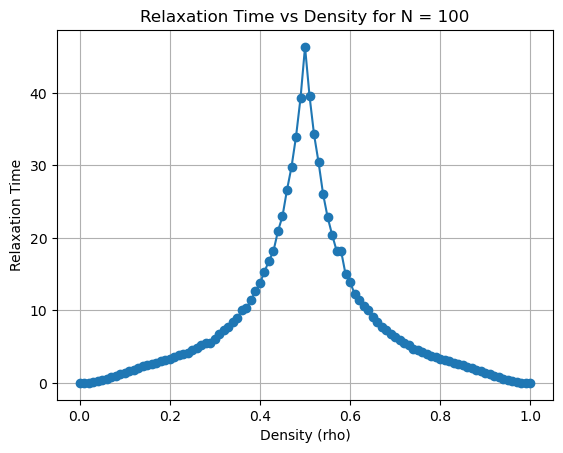

In [15]:
#accessing saved data for relaxation time and order param from xlsx file - 

#accessing for a single system size L for the various rho as an array  -
import pandas as pd
import matplotlib.pyplot as plt
#_________________________________________________________________
# Load the Excel file
df2 = pd.read_excel('relaxation_time_data.xlsx')
# Define the N value you want to filter by
N_value = 100  # replace this with your desired N value

# Get rho values for the given N
rho_array = df2[df2['N'] == N_value]['Density'].to_numpy()
print(rho_array)
# Get relaxn_time values for the given N
relaxn_time_list = df2[df2['N'] == N_value]['Relax_time'].to_numpy()
print(relaxn_time_list)
# Plot the rho vs relaxn_time
plt.plot(rho_array, relaxn_time_list, marker='o')
plt.xlabel('Density (rho)')
plt.ylabel('Relaxation Time')
plt.title(f'Relaxation Time vs Density for N = {N_value}')
plt.grid(True)
plt.show()
#___________________________________________________________________



N_array: [   50   100   500  1000 10000]
rho_array: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
relaxation_times matrix:
[[1.000000e-03 1.000000e-03 1.000000e-03 1.000000e-03 8.300000e-02
  7.500000e-02 2.470000e-01 2.880000e-01 4.720000e-01 4.870000e-01
  7.640000e-01 8.390000e-01 1.051000e+00 1.103000e+00 1.343000e+00
  1.418000e+00 1.767000e+00 1.798000e+00 2.152000e+00 2.147000e+00
  2.466000e+00 2.392000e+00 2.808000e+00 2.852000e+00 3.270000e+00
  3.227000e+00 3.538000e+00 3.494000e+00 4.049000e+00 3.934000e+00
  4.571

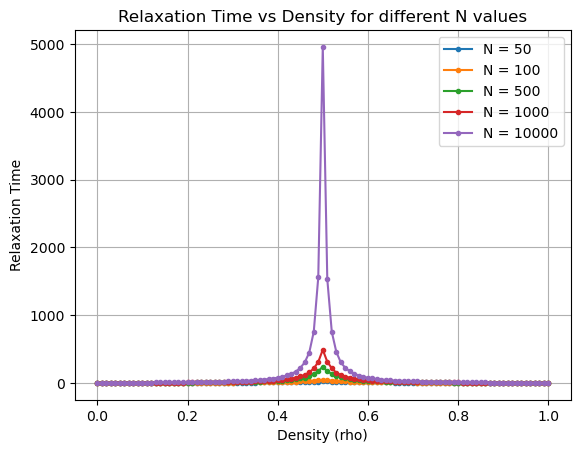

In [17]:
#code to save the relaxation_time_data as matrix which can then be used to do analysis ...
import pandas as pd
import numpy as np

# Load the Excel file
df2 = pd.read_excel('relaxation_time_data.xlsx')

# Get distinct N and rho values
N_array = np.sort(df2['N'].unique())  # Unique values of N, sorted
rho_array = np.sort(df2['Density'].unique())  # Unique values of Density (rho), sorted

# Initialize the relaxation_times matrix with zeros
relaxation_times = np.zeros((len(N_array), len(rho_array)))

# Populate the relaxation_times matrix
for i, N in enumerate(N_array):
    for j, rho in enumerate(rho_array):
        # Find the relaxation time for this N and rho, if it exists
        matching_row = df2[(df2['N'] == N) & (df2['Density'] == rho)]
        if not matching_row.empty:
            relaxation_times[i, j] = matching_row['Relax_time'].values[0]  # Store the relaxation time

# Print the result
print("N_array:", N_array)
print("rho_array:", rho_array)
print("relaxation_times matrix:")
print(relaxation_times)

# Plot relaxation time vs rho for each N
for i, N in enumerate(N_array):
    plt.plot(rho_array, relaxation_times[i, :], label=f'N = {N}', marker='.')

plt.xlabel('Density (rho)')
plt.ylabel('Relaxation Time')
plt.title('Relaxation Time vs Density for different N values')
plt.legend()
plt.grid(True)
plt.show()

now we generate data for our cluster size distr

- And we save different files for different densities[ the current problem is that I am not very sure how this file may be cumbersome to work with..]
- we do it in a different notebook to avoid making things messy